In [26]:
import tensorflow as  tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Fashion Dataset and Data Preprocessing


In [10]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()
len(x_train), len(x_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 10000)

In [24]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

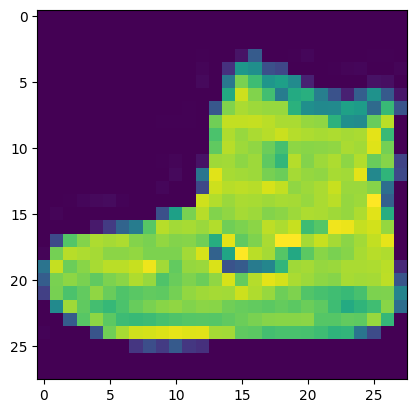

In [14]:
plt.imshow(x_train[0])
plt.grid(False)
plt.show()

In [15]:
# CNN requires the 4D tensor for training. Batch_size, height, width, channels
# Reshape the images(batch_size, height, width, channels)

x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
# Normalize the pixel values

x_train /= 255
x_test /= 255

In [21]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [23]:
y_train.shape

(60000, 10)

# Building Model

In [27]:
model_1 = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)), #convolutional layer with 64 filters
    MaxPool2D(pool_size=(2,2)), # Max Pooling layer
    Flatten(), # Flatten Layer
    Dense(128, activation='relu'), # Hidden Layer
    Dense(10, activation='softmax') # Output Layer
])

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train, epochs=10, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.8134 - loss: 0.5237 - val_accuracy: 0.8967 - val_loss: 0.3015
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.9041 - loss: 0.2688 - val_accuracy: 0.8985 - val_loss: 0.2769
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9194 - loss: 0.2168 - val_accuracy: 0.9007 - val_loss: 0.2652
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9326 - loss: 0.1827 - val_accuracy: 0.9117 - val_loss: 0.2497
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9435 - loss: 0.1557 - val_accuracy: 0.9077 - val_loss: 0.2741
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.9544 - loss: 0.1242 - val_accuracy: 0.9122 - val_loss: 0.2742
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.9624 - loss: 0.1023 - val_accuracy: 0.9138 - val_loss: 0.2678
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 38ms/step - accuracy: 0.9696 -

In [28]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,159,520 (15.87 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,773,014 (10.58 MB)

In [29]:
model_1.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9135 - loss: 0.3453


[0.33549126982688904, 0.9154000282287598]